In [ ]:
# tensorflow==2.18.0
# tensorflow-datasets==4.9.7
# matplotlib==3.10.1
# pandas==2.2.3
# opencv-python==4.11.0.86
# scikit-learn==1.6.1
# jupyter==1.1.1


# 1. Import Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import pathlib

from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [2]:
# 2. Load dataset¶
# data_dir = pathlib.Path("../input/microsoft-catsvsdogs-dataset/PetImages")
data_dir = pathlib.Path("temp/")

print(data_dir)
list(data_dir.glob('*/*.jpg'))[:5]

temp


[WindowsPath('temp/cats_set/cat.4001.jpg'),
 WindowsPath('temp/cats_set/cat.4002.jpg'),
 WindowsPath('temp/cats_set/cat.4003.jpg'),
 WindowsPath('temp/cats_set/cat.4004.jpg'),
 WindowsPath('temp/cats_set/cat.4005.jpg')]

In [3]:
dogs = list(data_dir.glob('dogs_set/*'))
dogs[:5]

[WindowsPath('temp/dogs_set/dog.4001.jpg'),
 WindowsPath('temp/dogs_set/dog.4002.jpg'),
 WindowsPath('temp/dogs_set/dog.4003.jpg'),
 WindowsPath('temp/dogs_set/dog.4004.jpg'),
 WindowsPath('temp/dogs_set/dog.4005.jpg')]

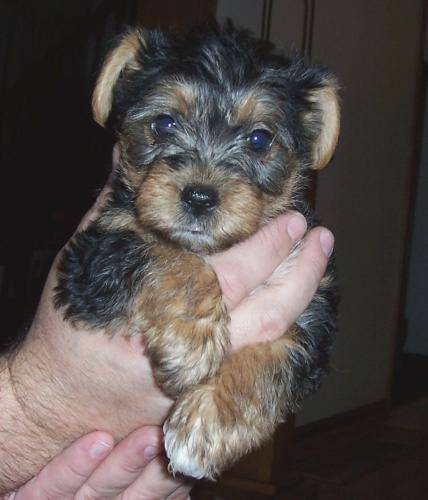

In [4]:
PIL.Image.open(str(dogs[1]))

In [5]:
cats = list(data_dir.glob('cats_set/*'))
cats[:5]

[WindowsPath('temp/cats_set/cat.4001.jpg'),
 WindowsPath('temp/cats_set/cat.4002.jpg'),
 WindowsPath('temp/cats_set/cat.4003.jpg'),
 WindowsPath('temp/cats_set/cat.4004.jpg'),
 WindowsPath('temp/cats_set/cat.4005.jpg')]

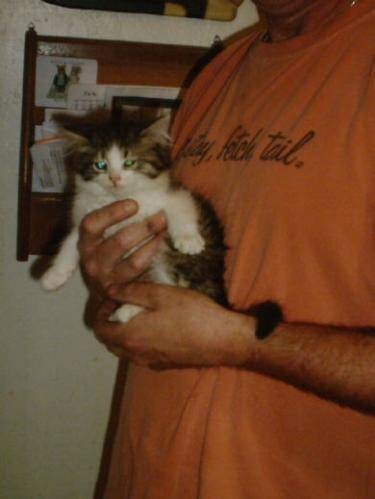

In [6]:
PIL.Image.open(str(cats[1]))

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1000


In [9]:
# 3. Read Pets images from disk into numpy array using opencv
pet_images_dict = {
    'cats': list(data_dir.glob('cats_set/*')),
    'dogs': list(data_dir.glob('dogs_set/*')),
}

pet_labels_dict = {
    'cats': 0,
    'dogs': 1,
}

In [11]:
pet_images_dict['dogs'][:5]

[WindowsPath('temp/dogs_set/dog.4001.jpg'),
 WindowsPath('temp/dogs_set/dog.4002.jpg'),
 WindowsPath('temp/dogs_set/dog.4003.jpg'),
 WindowsPath('temp/dogs_set/dog.4004.jpg'),
 WindowsPath('temp/dogs_set/dog.4005.jpg')]

In [12]:
pet_images_dict['cats'][:5]

[WindowsPath('temp/cats_set/cat.4001.jpg'),
 WindowsPath('temp/cats_set/cat.4002.jpg'),
 WindowsPath('temp/cats_set/cat.4003.jpg'),
 WindowsPath('temp/cats_set/cat.4004.jpg'),
 WindowsPath('temp/cats_set/cat.4005.jpg')]

In [13]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
X, Y = [], []

for pet_name, images in pet_images_dict.items():
    print(pet_name)
    for image in images:
        img = cv2.imread(str(image))
        if isinstance(img,type(None)): 
            print('image not found') # NOTE: can be commented out if o/p is large
            continue
            
        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X.append(resized_img)
            Y.append(pet_labels_dict[pet_name])
        else:
            print("Invalid Image") # NOTE: can be commented out if o/p is large
            continue

cats
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
dogs
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image


In [21]:
print(len(X))
print(len(Y))

977
977


In [14]:
X = np.array(X)
Y = np.array(Y)

In [15]:
# 4. Train Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

732 732
245 245
(732, 128, 128, 3) (732,)
(245, 128, 128, 3) (245,)


In [16]:
# 5. Build convolutional neural network and train it

IMAGE_CHANNELS=3
model = Sequential([

Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(),
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='sigmoid'), # 2 because we have cat and dog classes
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

c:\Users\UCT\Desktop\ashwani_stuff\tut_CNN_cat_vs_dogs\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,942,273 (49.37 MB)

 Trainable params: 12,940,801 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [17]:
history=model.fit(X_train, Y_train, epochs=10) # with 10 epochs took 3 minutes.

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 493ms/step - accuracy: 0.5309 - loss: 1.5425
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 488ms/step - accuracy: 0.6999 - loss: 0.6086
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 486ms/step - accuracy: 0.7780 - loss: 0.4954
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 486ms/step - accuracy: 0.8156 - loss: 0.4312
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 489ms/step - accuracy: 0.8405 - loss: 0.3647
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 488ms/step - accuracy: 0.8794 - loss: 0.2836
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 487ms/step - accuracy: 0.8778 - loss: 0.2859
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 487ms/step - accuracy: 0.9359 - loss: 0.1833
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 501ms/step - accuracy: 0.9177 - loss: 0.1980
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 485ms/step - accuracy: 0.9317 - loss: 0.1686


In [18]:
model.evaluate(X_test,Y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.6610 - loss: 0.6466 


[0.7031680941581726, 0.6489796042442322]

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)
y_pred_classes = [0 if element < 0.5 else 1 for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.65      0.65       124
           1       0.64      0.64      0.64       121

    accuracy                           0.65       245
   macro avg       0.65      0.65      0.65       245
weighted avg       0.65      0.65      0.65       245



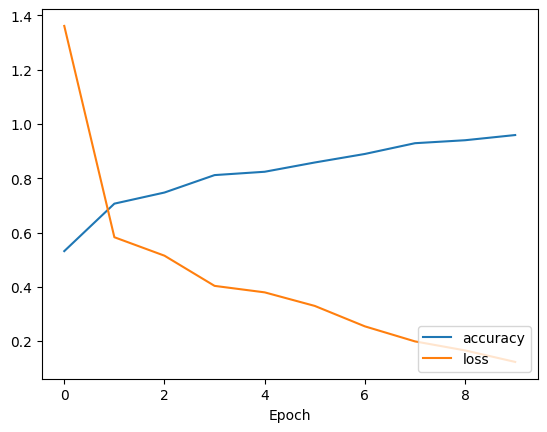

In [28]:
# 6. Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[0.33156705]]
class: 0 name= cat


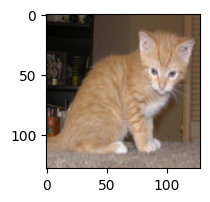

In [20]:
classes = ["cat","dog"]
fileImage = Image.open("temp/cats_set/cat.4003.jpg").convert("RGB").resize([IMAGE_WIDTH,IMAGE_HEIGHT],Image.LANCZOS)
image = np.array(fileImage)
myimage = image.reshape(1, IMAGE_WIDTH,IMAGE_HEIGHT,3)
plt.figure(figsize = (4,2))
plt.imshow(image)

my_predicted_image = model.predict(myimage)
print(my_predicted_image)
if (my_predicted_image < 0.40):
    y_class=0 
else:
    y_class=1
print("class:",y_class,"name=",classes[y_class])

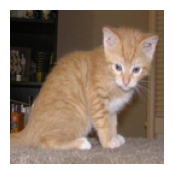

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
Prediction Score: 0.0000
Class: 0, Name: cat


In [33]:
# Load and preprocess the image
fileImage = Image.open("temp/cats_set/cat.4003.jpg").convert("RGB")
fileImage = fileImage.resize((IMAGE_WIDTH, IMAGE_HEIGHT), Image.LANCZOS)  # Use LANCZOS instead of ANTIALIAS

# Convert to NumPy array
image = np.array(fileImage)

# Reshape for model input (batch_size, IMAGE_WIDTH, IMAGE_HEIGHT, channels)
myimage = image.reshape(1, IMAGE_WIDTH, IMAGE_HEIGHT, 3).astype('float32') / 255.0  # Normalize

# Display the image
plt.figure(figsize=(4,2))
plt.imshow(image)
plt.axis('off')
plt.show()

# Make prediction
my_predicted_image = model.predict(myimage)  # Ensure model is loaded and defined

# Ensure model outputs a probability
prediction = my_predicted_image[0][0] if my_predicted_image.ndim > 1 else my_predicted_image[0]

# Classify based on threshold
y_class = 0 if prediction < 0.40 else 1
classes = ["cat", "dog"]
print(f"Prediction Score: {prediction:.4f}")
print(f"Class: {y_class}, Name: {classes[y_class]}")
